# Exploratory Data Analysis (EDA) - Correlation study

In [1]:
import re, calendar, time, datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import string

In [57]:
df0 = pd.read_csv('../data/train_eda_density_Vavg3.csv')

In [58]:
df0.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_time,...,drop_Dstd,dDstd,dDstd_abs,speed,pick_Vavg,drop_Vavg,pick_Vavg_error,drop_Vavg_error,dVavg,direction
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,3,14,17.415278,...,7.051886,-1.613326,1.613326,11.856428,12.647951,12.186511,6.055981,6.370717,-0.461440,99.970196
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,12,0.726389,...,5.992918,0.811032,0.811032,9.803659,13.895958,12.365101,7.416681,5.280355,-1.530857,-117.153768
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,19,11.590000,...,3.353795,-10.339044,10.339044,10.822201,12.220071,16.286034,6.745028,7.882526,4.065962,-159.680165
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,4,6,19.541944,...,3.479175,-0.266011,0.266011,12.465721,14.588690,15.032400,6.445864,6.956154,0.443711,-172.737700
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,3,26,13.515278,...,4.316270,2.384939,2.384939,9.836594,15.487073,15.689971,6.578663,6.452190,0.202898,179.473585


In [185]:
df0['dVavg_abs'] = df0['dVavg'].apply(np.abs)
df0['Vavg'] = (df0['pick_Vavg']+df0['drop_Vavg'])/2
df0['expect_duration_pickup']  = df0['distance']/df0['pick_Vavg']*60*60
df0['expect_duration_dropoff'] = df0['distance']/df0['drop_Vavg']*60*60
df0['expect_duration_avg'] = df0['distance']/df0['Vavg']*60*60

avgerr = (df0['pick_Vavg_error']**2+df0['drop_Vavg_error']**2).apply(np.sqrt)/2
df0['expect_duration_avg_error'] = df0['expect_duration_avg']*avgerr/df0['Vavg']

df0.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_time,...,pick_Vavg_error,drop_Vavg_error,dVavg,direction,dVavg_abs,expect_duration_pickup,expect_duration_dropoff,expect_duration_avg,expect_duration_avg_error,Vavg
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,3,14,17.415278,...,6.055981,6.370717,-0.461440,99.970196,0.461440,426.525601,442.675916,434.450717,153.767929,12.417231
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,12,0.726389,...,7.416681,5.280355,-1.530857,-117.153768,1.530857,467.749384,525.658947,495.016281,171.615497,13.130529
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,19,11.590000,...,6.745028,7.882526,4.065962,-159.680165,4.065962,1881.032760,1411.415136,1612.732042,586.935312,14.253053
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,4,6,19.541944,...,6.445864,6.956154,0.443711,-172.737700,0.443711,366.571259,355.751191,361.080185,115.603875,14.810545
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,3,26,13.515278,...,6.578663,6.452190,0.202898,179.473585,0.202898,276.289677,272.716786,274.491606,81.128307,15.588522


In [109]:
n_samples = len(df0)
print 'Data samples : ', n_samples
print 'Distance +/-0.5%', df0['distance'].quantile(0.05),  df0['distance'].quantile(0.95)
print 'Duration +/-0.5%', df0['trip_duration'].quantile(0.05),  df0['trip_duration'].quantile(0.95)
print 'Speed +/-0.5%',    df0['speed'].quantile(0.05),  df0['speed'].quantile(0.95)

Data samples :  1458644
Distance +/-0.5% 0.59567376271 11.0193052179
Duration +/-0.5% 180.0 2104.0
Speed +/-0.5% 5.04075462239 29.4417810338


In [110]:
infmin = -float('Inf')
infmax =  float('Inf')
def cutbase_selection( dataframe, name_variable, cut_min=infmin, cut_max=infmax, isBetween=True ):
    if isBetween:
        return dataframe[ ( dataframe[name_variable] >= cut_min ) & ( dataframe[name_variable] < cut_max ) ]
    else:
        return dataframe[ ( dataframe[name_variable] <= cut_min ) | ( dataframe[name_variable] > cut_max ) ]    

In [186]:
# name_variable : [apply, isBetween, cut_min (>=), cut_max(<) ]
cut_dict = { 'trip_duration'     : [ True,  True, 60*5,   60*60*3 ], # 5 min <-> 3 hr 
             'pickup_longitude'  : [ False, True, infmin, infmax ],
             'pickup_latitude'   : [ False, True, infmin, infmax ],
             'dropoff_longitude' : [ False, True, infmin, infmax ],
             'dropoff_latitude'  : [ False, True, infmin, infmax ],
             'vendor_id'         : [ False, True, infmin, infmax ],
             'passenger_count'   : [ False, True, infmin, infmax ],
             'pickup_month'      : [ False, True, infmin, infmax ],
             'pickup_day'        : [ False, True, infmin, infmax ],
             'pickup_time'       : [ False, True, infmin, infmax ],
             'pickup_weekday'    : [ False, True, infmin, infmax ],
             'dropoff_month'     : [ False, True, infmin, infmax ],
             'dropoff_day'       : [ False, True, infmin, infmax ],
             'dropoff_time'      : [ False, True, infmin, infmax ],
             'dropoff_weekday'   : [ False, True, infmin, infmax ],
             'store_and_fwd_flag': [ False, True, infmin, infmax ],
             'distance'          : [ True,  True, 0.59567376271, 11.0193052179 ], # quantile(0.05) <-> quantile(0.95)
             'speed'             : [ True,  True, 5.,     100.],
             'pick_D'            : [ False, True, infmin, infmax ],
             'pick_Dstd'         : [ False, True, infmin, infmax ],
             'drop_D'            : [ False, True, infmin, infmax ],
             'drop_Dstd'         : [ False, True, infmin, infmax ],
             'dDstd'             : [ False, True, infmin, infmax ],
             'dDstd_abs'         : [ False, True, infmin, infmax ],
             'pick_Vavg'         : [ False,  True, infmin, infmax ],
             'drop_Vavg'         : [ False,  True, infmin, infmax ],
             'pick_Vavg_error'   : [ False, True, infmin, infmax ],
             'drop_Vavg_error'   : [ False, True, infmin, infmax ],
             'Vavg'              : [ False, True, infmin, infmax ],
             'dVavg'             : [ False, True, infmin, infmax ],
             'dVavg_abs'         : [ False, True, infmin, infmax ],
             'direction'         : [ False, True, infmin, infmax ],
             'expect_duration_pickup' : [ False, True, infmin, infmax ],
             'expect_duration_dropoff': [ False, True, infmin, infmax ],
             'expect_duration_avg': [ False, True, infmin, infmax ],
             'expect_duration_avg_error' : [ False, True, infmin, infmax ]
           }

In [187]:
df = df0.copy()
for var in cut_dict:
    if cut_dict[var][0]:
        print var, cut_dict[var][2], cut_dict[var][3], cut_dict[var][1]
        df = cutbase_selection( df, var, cut_dict[var][2], cut_dict[var][3], cut_dict[var][1] )
n_samples_cut = len(df)
print 'Left samples : %d, eff: %.2f '%( n_samples_cut, float(n_samples_cut)/float(n_samples)) 
df.head()

distance 0.59567376271 11.0193052179 True
speed 5.0 100.0 True
trip_duration 300 10800 True
Left samples : 1100046, eff: 0.75 


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_time,...,pick_Vavg_error,drop_Vavg_error,dVavg,direction,dVavg_abs,expect_duration_pickup,expect_duration_dropoff,expect_duration_avg,expect_duration_avg_error,Vavg
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,3,14,17.415278,...,6.055981,6.370717,-0.461440,99.970196,0.461440,426.525601,442.675916,434.450717,153.767929,12.417231
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,12,0.726389,...,7.416681,5.280355,-1.530857,-117.153768,1.530857,467.749384,525.658947,495.016281,171.615497,13.130529
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,19,11.590000,...,6.745028,7.882526,4.065962,-159.680165,4.065962,1881.032760,1411.415136,1612.732042,586.935312,14.253053
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,4,6,19.541944,...,6.445864,6.956154,0.443711,-172.737700,0.443711,366.571259,355.751191,361.080185,115.603875,14.810545
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,3,26,13.515278,...,6.578663,6.452190,0.202898,179.473585,0.202898,276.289677,272.716786,274.491606,81.128307,15.588522


In [188]:
print 'Is there Nan: ', df.isnull().any().any()

Is there Nan:  False


In [189]:
print 'Is there Inf: ', df.apply(np.isinf).any().any()

Is there Inf:  False


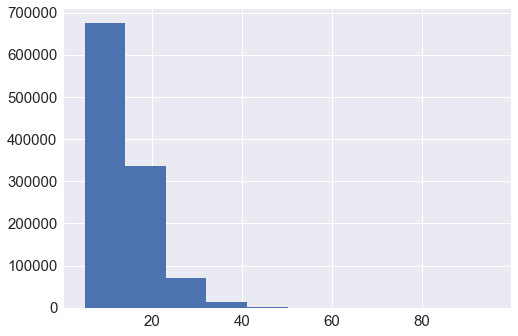

In [190]:
plt.hist(df['speed'].values)
plt.show()

In [191]:
df.columns

Index([u'vendor_id', u'passenger_count', u'pickup_longitude',
       u'pickup_latitude', u'dropoff_longitude', u'dropoff_latitude',
       u'trip_duration', u'pickup_month', u'pickup_day', u'pickup_time',
       u'pickup_weekday', u'pickup_timestamp', u'dropoff_month',
       u'dropoff_day', u'dropoff_time', u'dropoff_weekday',
       u'dropoff_timestamp', u'store_and_fwd_flag', u'distance',
       u'pick_xlabel', u'pick_ylabel', u'drop_xlabel', u'drop_ylabel',
       u'pick_pixel', u'drop_pixel', u'pick_D', u'pick_Dstd', u'drop_D',
       u'drop_Dstd', u'dDstd', u'dDstd_abs', u'speed', u'pick_Vavg',
       u'drop_Vavg', u'pick_Vavg_error', u'drop_Vavg_error', u'dVavg',
       u'direction', u'dVavg_abs', u'expect_duration_pickup',
       u'expect_duration_dropoff', u'expect_duration_avg',
       u'expect_duration_avg_error', u'Vavg'],
      dtype='object')

In [192]:
cols = ['trip_duration',
        #'pickup_longitude',
        #'pickup_latitude', 
        #'dropoff_longitude', 
        #'dropoff_latitude',
        'vendor_id', 
        'passenger_count',
        'pickup_month',
        'pickup_day',
        'pickup_time',
        'pickup_weekday', 
        #'pickup_timestamp', 
        'dropoff_month',
        'dropoff_day', 
        'dropoff_time', 
        'dropoff_weekday',
        #'dropoff_timestamp', 
        'store_and_fwd_flag', 
        'distance',
        #'pick_xlabel', 
        #'pick_ylabel', 
        #'drop_xlabel', 
        #'drop_ylabel',
        #'pick_pixel', 
        #'drop_pixel', 
        'pick_D', 
        'pick_Dstd', 
        'drop_D',
        'drop_Dstd', 
        'dDstd', 
        'dDstd_abs',
        #'speed', 
        'pick_Vavg', 
        'drop_Vavg', 
        'pick_Vavg_error',
        'drop_Vavg_error',
        'Vavg',
        'dVavg',
        'dVavg_abs',
        'direction',
        'expect_duration_pickup', 
        'expect_duration_dropoff',
        'expect_duration_avg',
        'expect_duration_avg_error']
len(cols)

31

In [193]:
cm = np.corrcoef(df[cols].values.T)

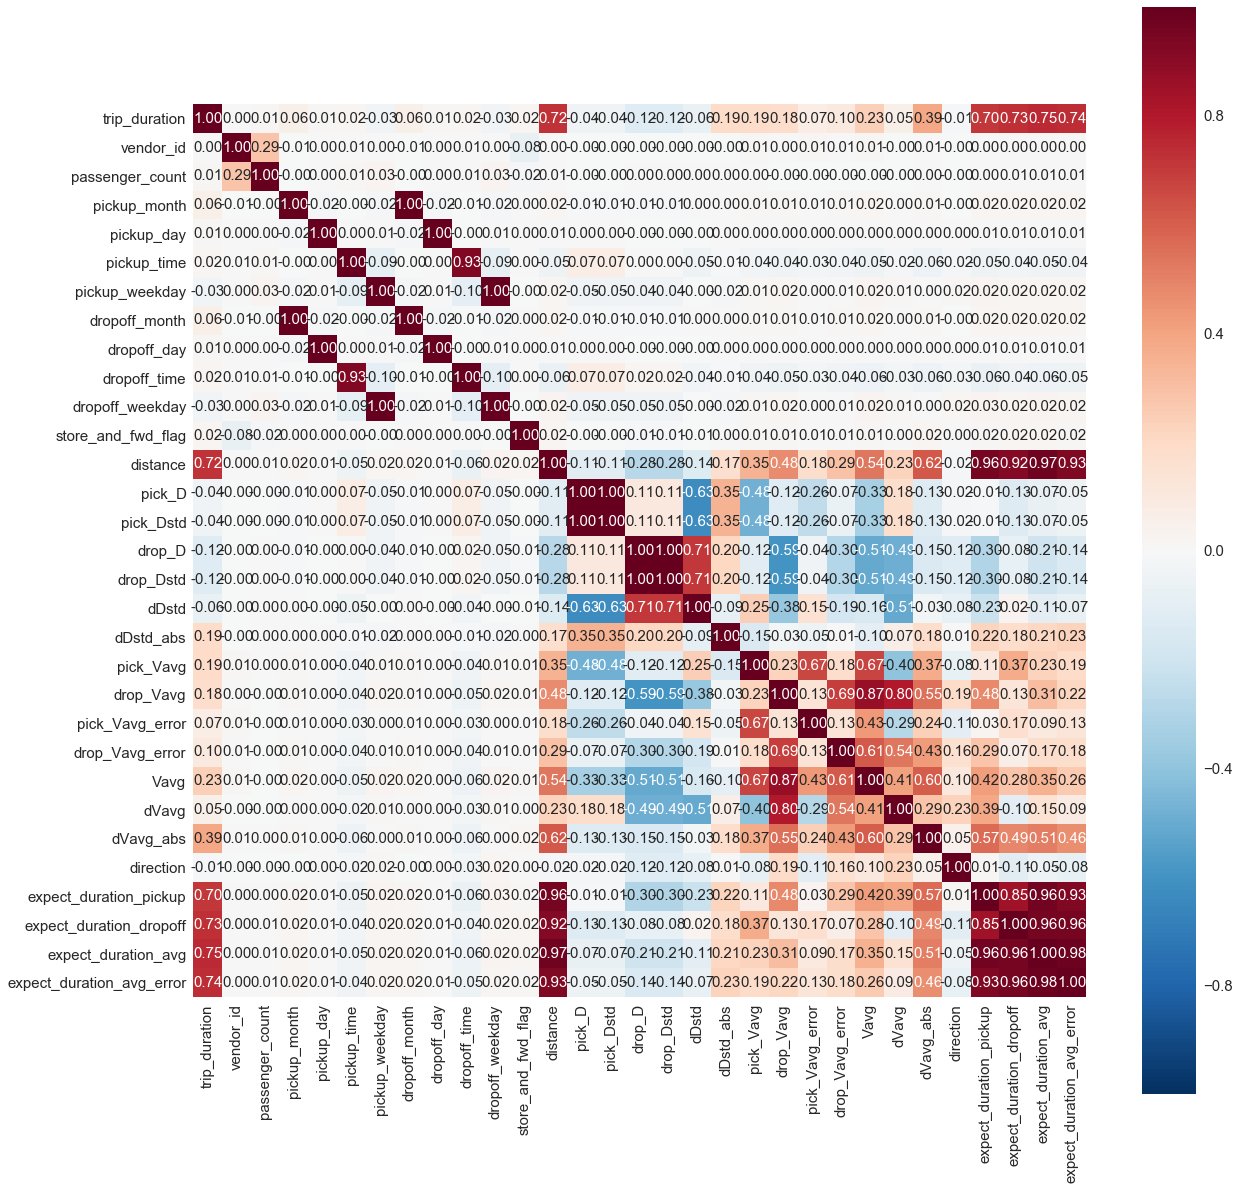

In [194]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
hm = sns.heatmap( cm, 
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols,
                xticklabels=cols, 
                )
plt.show()

In [154]:
from sklearn.model_selection import cross_val_score, train_test_split,ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

def sample_split(df):
    #data =  data[selected_feature]
    relevent_cols = list(df)
    data=df.values.astype(float)             
    Y = data[:,0]
    X = data[:,1:]
    test_size = .3
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state = 3)
    return X_train, X_test, y_train, y_test,X,Y

def reg_analysis(model, df):
    # get train, test set amd X,y here (for cross-validation) 
    X_train, X_test, y_train, y_test, X, Y = sample_split(df)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    # Cross-validation score
    cv = ShuffleSplit(n_splits=4, test_size=0.3, random_state=0)
    
    print ('cv model score = ',cross_val_score(model, X, Y, cv=cv))
    # Model score
    print ('Model score = ',model.score(X_test,y_test))
    # Mean squared log error
    # https://www.kaggle.com/wiki/RootMeanSquaredError
    #print ('Mean squared log error = ', mean_squared_error(prediction, y_test))
    # RMSLE score
    sum=0.0
    for x in range(len(prediction)):
        p = np.log(prediction[x]+1)
        r = np.log(y_test[x]+1)
        sum = sum + (p - r)**2
    print ('RMSLE score =  ',(sum/len(prediction))**0.5)
    return model

In [233]:
cols_train = [
        'trip_duration',
        'pickup_longitude',
        'pickup_latitude', 
        'dropoff_longitude', 
        'dropoff_latitude',
        'vendor_id', 
        'passenger_count',
        'pickup_month',
        'pickup_day',
        'pickup_time',
        'pickup_weekday', 
        #'pickup_timestamp', 
        #'dropoff_month',
        #'dropoff_day', 
        #'dropoff_time', 
        #'dropoff_weekday',
        #'dropoff_timestamp', 
        #'store_and_fwd_flag', 
        'distance',
        #'pick_xlabel', 
        #'pick_ylabel', 
        #'drop_xlabel', 
        #'drop_ylabel',
        #'pick_pixel', 
        #'drop_pixel', 
        'pick_D', 
        'pick_Dstd', 
        'drop_D',
        'drop_Dstd', 
        'dDstd', 
        'dDstd_abs',
        #'speed', 
        'pick_Vavg', 
        'drop_Vavg', 
        #'pick_Vavg_error',
        #'drop_Vavg_error',
        'Vavg',      
        'dVavg',
        'dVavg_abs',
        'direction',
        'expect_duration_pickup', 
        'expect_duration_dropoff',
        'expect_duration_avg',
        #'expect_duration_avg_error'
        ]
len(cols_train)

27

In [234]:
df_train = df.sample(50000)
#df_train = df.copy()

In [235]:
from sklearn.ensemble import RandomForestRegressor

start_time = time.time()
rf_model = RandomForestRegressor()
reg_analysis(rf_model, df_train[cols_train])

print 'Used %.2f sec.'%( time.time() - start_time)

('cv model score = ', array([ 0.68407712,  0.68294373,  0.67064903,  0.68529979]))
('Model score = ', 0.68343381748647225)
('RMSLE score =  ', 0.27826131690728434)
Used 33.49 sec.


In [236]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(len(cols_train)-1):
    print '%d) %-*s %f'%(i+1, 30, cols_train[indices[i]+1], importances[indices[i]])

1) expect_duration_avg            0.412924
2) expect_duration_dropoff        0.181480
3) pickup_time                    0.091629
4) direction                      0.048015
5) pickup_weekday                 0.031930
6) dropoff_longitude              0.019013
7) pickup_latitude                0.017370
8) dropoff_latitude               0.017003
9) distance                       0.016744
10) pickup_longitude               0.016354
11) pickup_day                     0.014807
12) expect_duration_pickup         0.013430
13) pickup_month                   0.013407
14) Vavg                           0.012318
15) dDstd_abs                      0.011912
16) dVavg_abs                      0.010765
17) pick_Vavg                      0.010690
18) dDstd                          0.009310
19) drop_Dstd                      0.008425
20) drop_D                         0.007926
21) drop_Vavg                      0.007911
22) dVavg                          0.007751
23) pick_Dstd                      0.0065

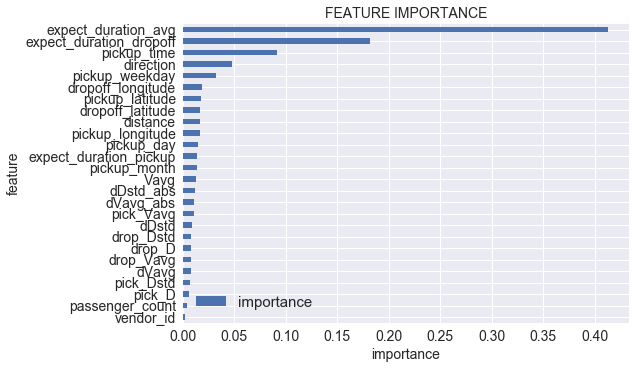

In [237]:
plt.figure(figsize=(20,20))
pd.DataFrame({'feature': cols_train[1:], \
              'importance': rf_model.feature_importances_})\
              .sort_values('importance').set_index('feature')\
              .plot(kind='barh', fontsize=14)

plt.title('FEATURE IMPORTANCE',fontsize=14 )
plt.xlabel('importance',fontsize=14)
plt.ylabel('feature',fontsize=14)
plt.show()